In [108]:
import pandas as pd

### Lendo os dados do MovieLens

In [109]:
avaliacoes = pd.read_csv('ml-latest-small/ratings.csv')

In [110]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [111]:
avaliacoes.shape

(100836, 4)

In [112]:
len(avaliacoes)

100836

In [113]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [114]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [115]:
avaliacoes.columns

Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [116]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [117]:
avaliacoes.query('filmeId==1').describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


### media das notas do filme 1

In [118]:
avaliacoes.query('filmeId==1')['nota'].mean()

3.9209302325581397

In [119]:
# Extraindo as notas medias por filmes

In [120]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()

In [121]:
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [122]:
filmes = pd.read_csv('ml-latest-small/movies.csv')

In [123]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [124]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId' )
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [125]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


### plotando histograma da distribuição das notas de um filme (usando matplotlib, através do pandas)

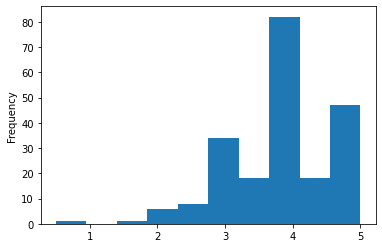

In [126]:
avaliacoes.query('filmeId ==1')['nota'].plot(kind='hist')

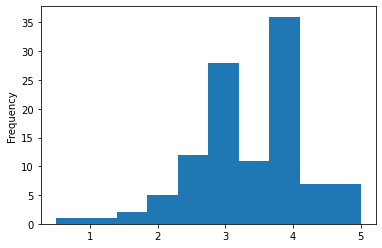

In [127]:
avaliacoes.query('filmeId ==2')['nota'].plot(kind='hist')

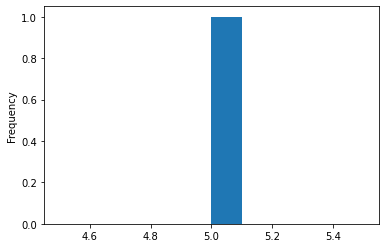

In [128]:
avaliacoes.query('filmeId ==102084')['nota'].plot(kind='hist')


Desafio 1
- Encontrar os 18 filmes que não tem nenhuma nota

Desafio 2
- Mudar o nome da coluna nota para media, após o join

Desafio 3
- Colocar a quantidade de avaliações no dataframe

Desafio 4
- Arredondar a nota para 2 casas decimais

Desafio 5 
- Descobrir quais são os valores únicos para genero

Desafio 6
- Contar o número de aparições de cada genero

Desafio 7
- Plotar o grafico do número de aparições de cada genero

## Desafio 1

### Encontrar os 18 filmes que não tem nenhuma nota

In [129]:
filmes[~filmes['filmeId'].isin(avaliacoes['filmeId'])]

,filmeId,titulo,generos
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


## Desafio 2

### Mudar o nome da coluna nota para media, após o join

In [130]:
filmes_com_media.rename(columns={'nota':'media'}, inplace=True)
filmes_com_media

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


## Desafio 3

### Colocar a quantidade de avaliações no dataframe

In [131]:
notas_medias_e_quantidade = avaliacoes.groupby('filmeId')['nota'].agg(['mean', 'count'])
notas_medias_e_quantidade 

,mean,count
filmeId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


## Desafio 4

### Arredondar a nota para 2 casas decimais

In [132]:
notas_medias_e_quantidade.columns = ['media', 'quantidade']

In [133]:
notas_medias_e_quantidade['media'] = notas_medias_e_quantidade['media'].round(2)
notas_medias_e_quantidade

,media,quantidade
filmeId,,
1,3.92,215
2,3.43,110
3,3.26,52
4,2.36,7
5,3.07,49
...,...,...
193581,4.00,1
193583,3.50,1
193585,3.50,1


## Desafio 5

### Descobrir quais são os valores únicos para genero

In [134]:
generos_serie = pd.DataFrame(filmes['generos'].str.split('|').tolist(), index=filmes.filmeId).stack()
generos_serie

filmeId   
1        0    Adventure
         1    Animation
         2     Children
         3       Comedy
         4      Fantasy
                ...    
193583   2      Fantasy
193585   0        Drama
193587   0       Action
         1    Animation
193609   0       Comedy
Length: 22084, dtype: object

In [135]:

generos = generos_serie.dropna().unique().tolist()
generos

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

### Solução apresentada na aula 2

In [138]:
generos_df = filmes.generos.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6

### Contar o número de aparições de cada genero

In [139]:
for item in generos:
    print('{} - {}'.format(item, filmes.generos.str.count(item).sum()))

(no genres listed) - 34
Action - 1828
Adventure - 1263
Animation - 611
Children - 664
Comedy - 3756
Crime - 1199
Documentary - 440
Drama - 4361
Fantasy - 779
Film-Noir - 87
Horror - 978
IMAX - 158
Musical - 334
Mystery - 573
Romance - 1596
Sci-Fi - 980
Thriller - 1894
War - 382
Western - 167


### Solução apresentada na aula 2

In [141]:
total_filmes_por_genero = filmes.generos.str.get_dummies().sum()
total_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Solução do Desafio 7
### Apresentado na aula 2

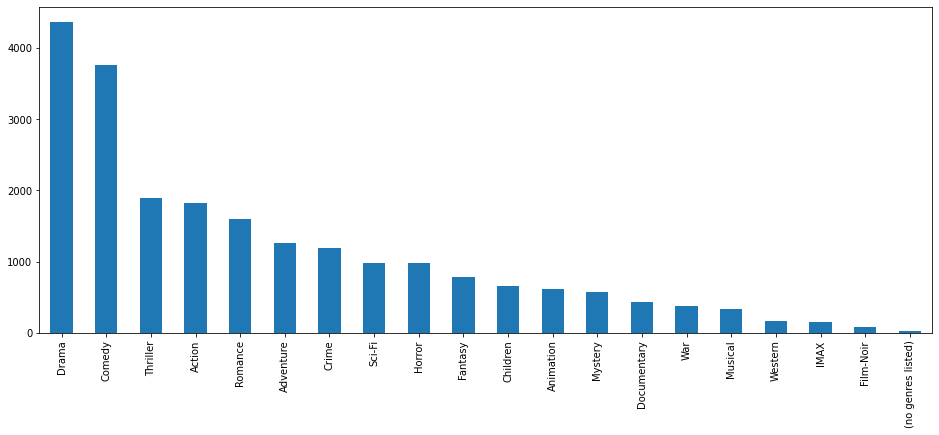

In [142]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))